# Assignment: Xarray Fundamentals with Atmospheric Radiation Data

In this assignment, we will use Xarray to analyze top-of-atmosphere radiation data from [NASA's CERES project](https://ceres.larc.nasa.gov/).

<img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/The-NASA-Earth%27s-Energy-Budget-Poster-Radiant-Energy-System-satellite-infrared-radiation-fluxes.jpg" width=65%>

_Public domain, by NASA, from Wikimedia Commons_


A pre-downloaded and subsetted a portion of the CERES dataset is available here: http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc. The size of the data file is 702.53 MB. It may take a few minutes to download.

Please review the CERES [FAQs](https://ceres.larc.nasa.gov/resources/faqs) before getting started.

Start by importing Numpy, Matplotlib, and Xarray. Set the default figure size to (12, 6).

In [2]:
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 6)
%config InlineBackend.figure_format = 'retina'

Next, download the NetCDF file using pooch.

import pooch
fname = pooch.retrieve(
    'http://ldeo.columbia.edu/~rpa/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc',
    known_hash='a876cc7106e7dcb1344fbec5dcd7510e5cd947e62049a8cbc188ad05ffe00345'
)
print(fname)

In [3]:
fname = '/data9/GR6901/data/CERES_EBAF-TOA_Edition4.0_200003-201701.condensed.nc'

## 1) Opening data and examining metadata

### 1.1) Open the dataset and display its contents 


In [4]:
ds = xr.open_dataset(fname)
ds

ERROR 1: PROJ: proj_create_from_database: Open of /opt/sw/anaconda3/2023.09/envs/pangeo23/share/proj failed


<xarray.Dataset>
Dimensions:                      (lon: 360, time: 203, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    ...                           ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 1.2) Print out the `long_name` attribute of each variable
Print `variable`: `long name` for each variable. Format the output so that the start of the `long name` attributes are aligned. 

In [5]:
ds.data_vars

Data variables:
    toa_sw_all_mon               (time, lat, lon) float32 ...
    toa_lw_all_mon               (time, lat, lon) float32 ...
    toa_net_all_mon              (time, lat, lon) float32 ...
    toa_sw_clr_mon               (time, lat, lon) float32 ...
    toa_lw_clr_mon               (time, lat, lon) float32 ...
    toa_net_clr_mon              (time, lat, lon) float32 ...
    toa_cre_sw_mon               (time, lat, lon) float32 ...
    toa_cre_lw_mon               (time, lat, lon) float32 ...
    toa_cre_net_mon              (time, lat, lon) float32 ...
    solar_mon                    (time, lat, lon) float32 ...
    cldarea_total_daynight_mon   (time, lat, lon) float32 ...
    cldpress_total_daynight_mon  (time, lat, lon) float32 ...
    cldtemp_total_daynight_mon   (time, lat, lon) float32 ...
    cldtau_total_day_mon         (time, lat, lon) float32 ...

In [6]:
for vname in ds.data_vars:
    print(vname, ':', ds[vname].long_name)

toa_sw_all_mon : Top of The Atmosphere Shortwave Flux, Monthly Means, All-Sky conditions
toa_lw_all_mon : Top of The Atmosphere Longwave Flux, Monthly Means, All-Sky conditions
toa_net_all_mon : Top of The Atmosphere Net Flux, Monthly Means, All-Sky conditions
toa_sw_clr_mon : Top of The Atmosphere Shortwave Flux, Monthly Means, Clear-Sky conditions
toa_lw_clr_mon : Top of The Atmosphere Longwave Flux, Monthly Means, Clear-Sky conditions
toa_net_clr_mon : Top of The Atmosphere Net Flux, Monthly Means, Clear-Sky conditions
toa_cre_sw_mon : Top of The Atmosphere Cloud Radiative Effects Shortwave Flux, Monthly Means
toa_cre_lw_mon : Top of The Atmosphere Cloud Radiative Effects Longwave Flux, Monthly Means
toa_cre_net_mon : Top of The Atmosphere Cloud Radiative Effects Net Flux, Monthly Means
solar_mon : Incoming Solar Flux, Monthly Means
cldarea_total_daynight_mon : Cloud Area Fraction, Monthly Means, Daytime-and-Nighttime conditions
cldpress_total_daynight_mon : Cloud Effective Pressure

## 2) Basic reductions, arithmetic, and plotting

### 2.1) Calculate the time-mean of the entire dataset

In [10]:
mean_vals = ds.mean(dim='time')
mean_vals

<xarray.Dataset>
Dimensions:                      (lon: 360, lat: 180)
Coordinates:
  * lon                          (lon) float32 0.5 1.5 2.5 ... 357.5 358.5 359.5
  * lat                          (lat) float32 -89.5 -88.5 -87.5 ... 88.5 89.5
Data variables: (12/14)
    toa_sw_all_mon               (lat, lon) float32 122.3 122.3 ... 104.4 104.4
    toa_lw_all_mon               (lat, lon) float32 141.1 141.1 ... 194.1 194.1
    toa_net_all_mon              (lat, lon) float32 -91.29 -91.29 ... -126.3
    toa_sw_clr_mon               (lat, lon) float32 119.9 119.9 ... 89.47 89.47
    toa_lw_clr_mon               (lat, lon) float32 140.2 140.2 ... 200.4 200.4
    toa_net_clr_mon              (lat, lon) float32 -88.03 -88.03 ... -117.6
    ...                           ...
    toa_cre_net_mon              (lat, lon) float32 -3.253 -3.251 ... -8.651
    solar_mon                    (lat, lon) float32 172.1 172.1 ... 172.3 172.3
    cldarea_total_daynight_mon   (lat, lon) float32 51.52 51.52 ... 78.93 78.93
    cldpress_total_daynight_mon  (lat, lon) float32 486.5 486.5 ... 766.9 766.9
    cldtemp_total_daynight_mon   (lat, lon) float32 225.2 225.2 ... 247.9 247.9
    cldtau_total_day_mon         (lat, lon) float32 4.158 4.158 ... 4.821 4.821

### 2.2) From this, make a 2D plot of the the time-mean Top of Atmosphere (TOA) Longwave, Shortwave, and Incoming Solar Radiation
(Use "All-Sky" conditions)

Note the sign conventions on each variable.

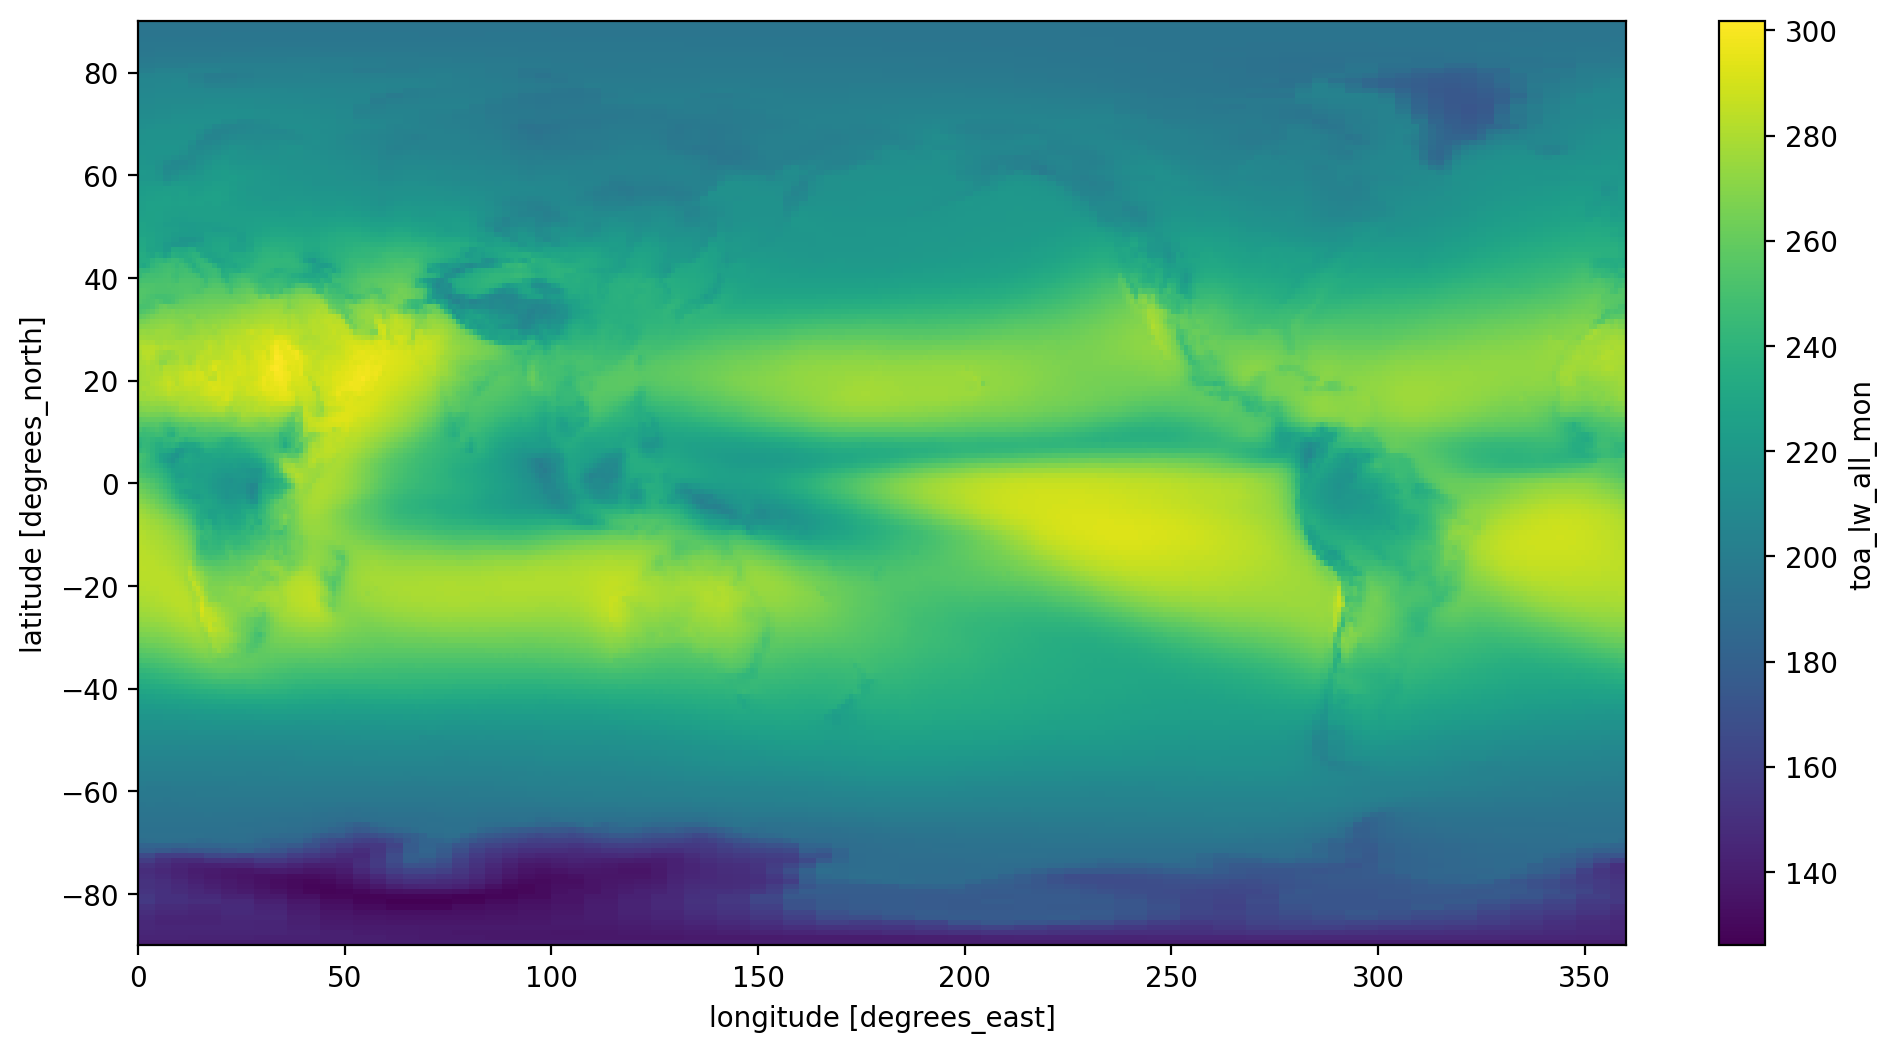

In [11]:
mean_vals.toa_lw_all_mon.plot()

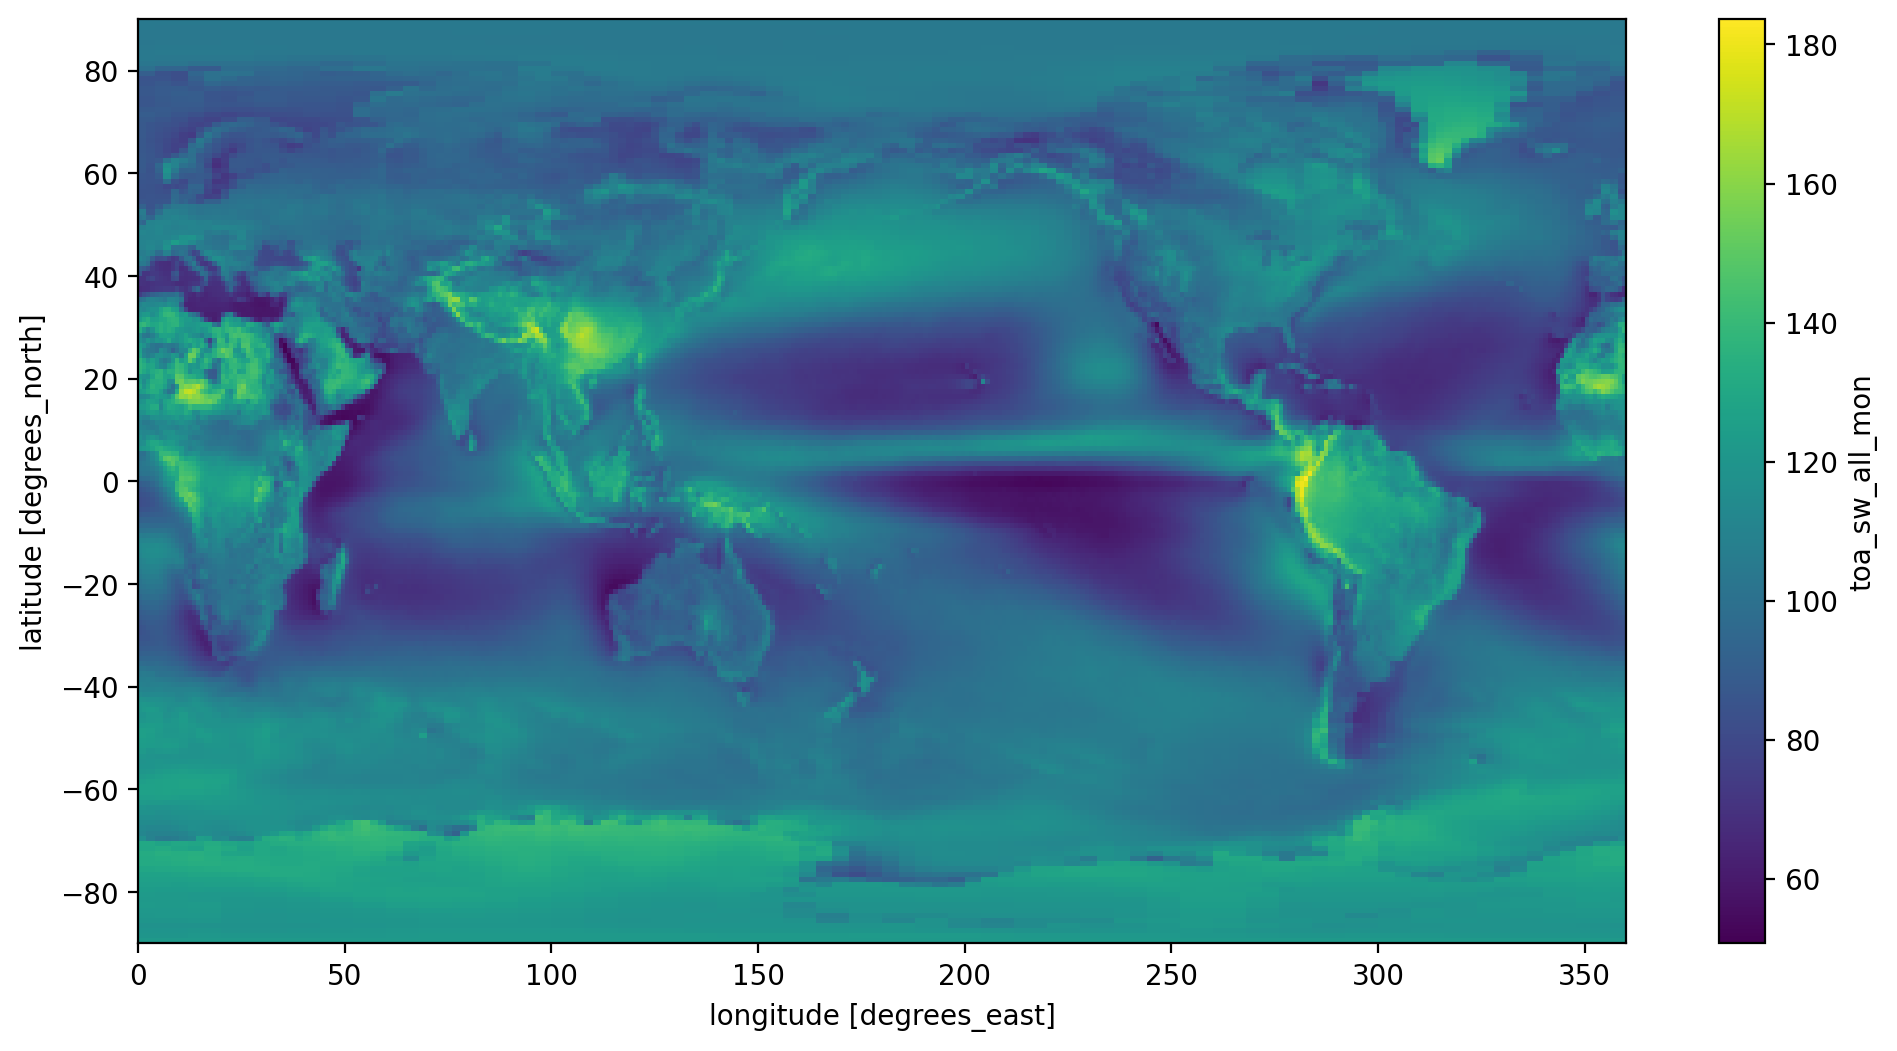

In [12]:
mean_vals.toa_sw_all_mon.plot()

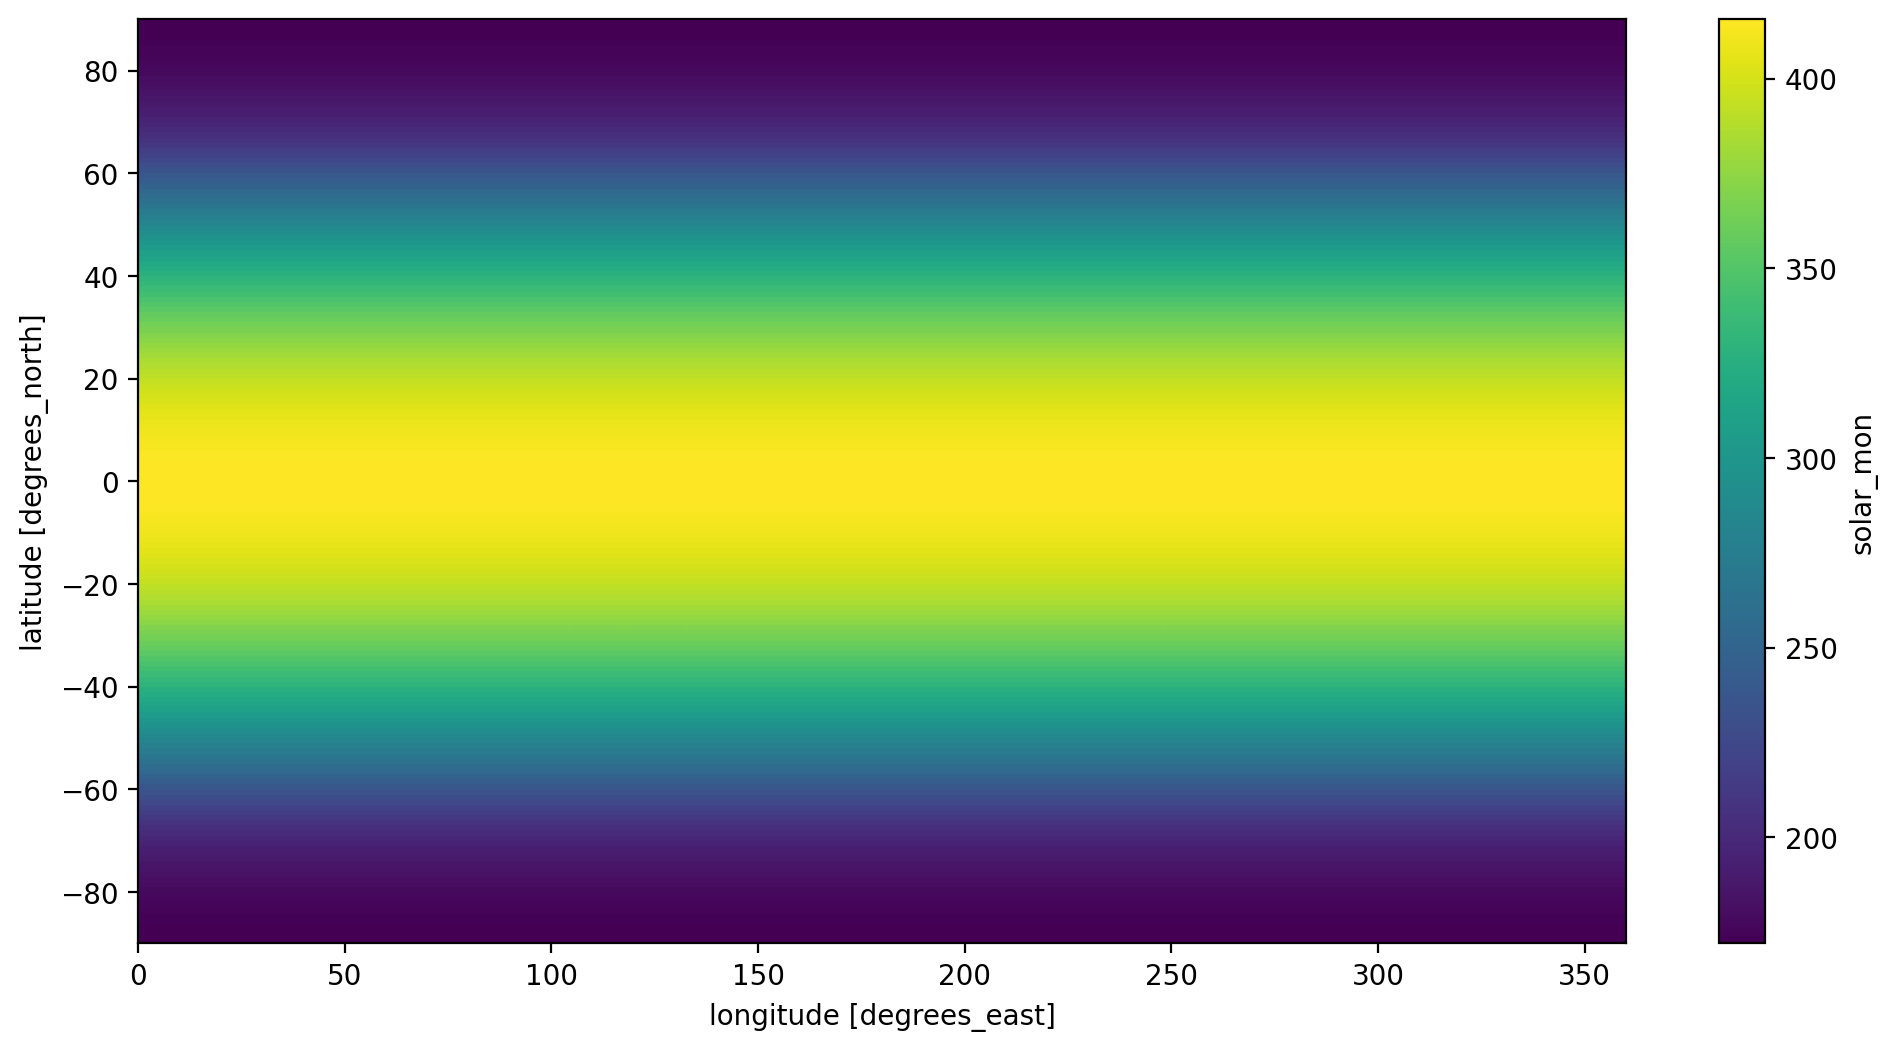

In [13]:
mean_vals.solar_mon.plot()

### 2.3) Add up the three variables above and verify (visually) that they are equivalent to the TOA net flux

You have to pay attention to and think carefully about the sign conventions (positive or negative) for each variable in order for the variables to sum to the right TOA net flux. Refer to the NASA figure at the top of the page to understand incoming and outgoing radiation.

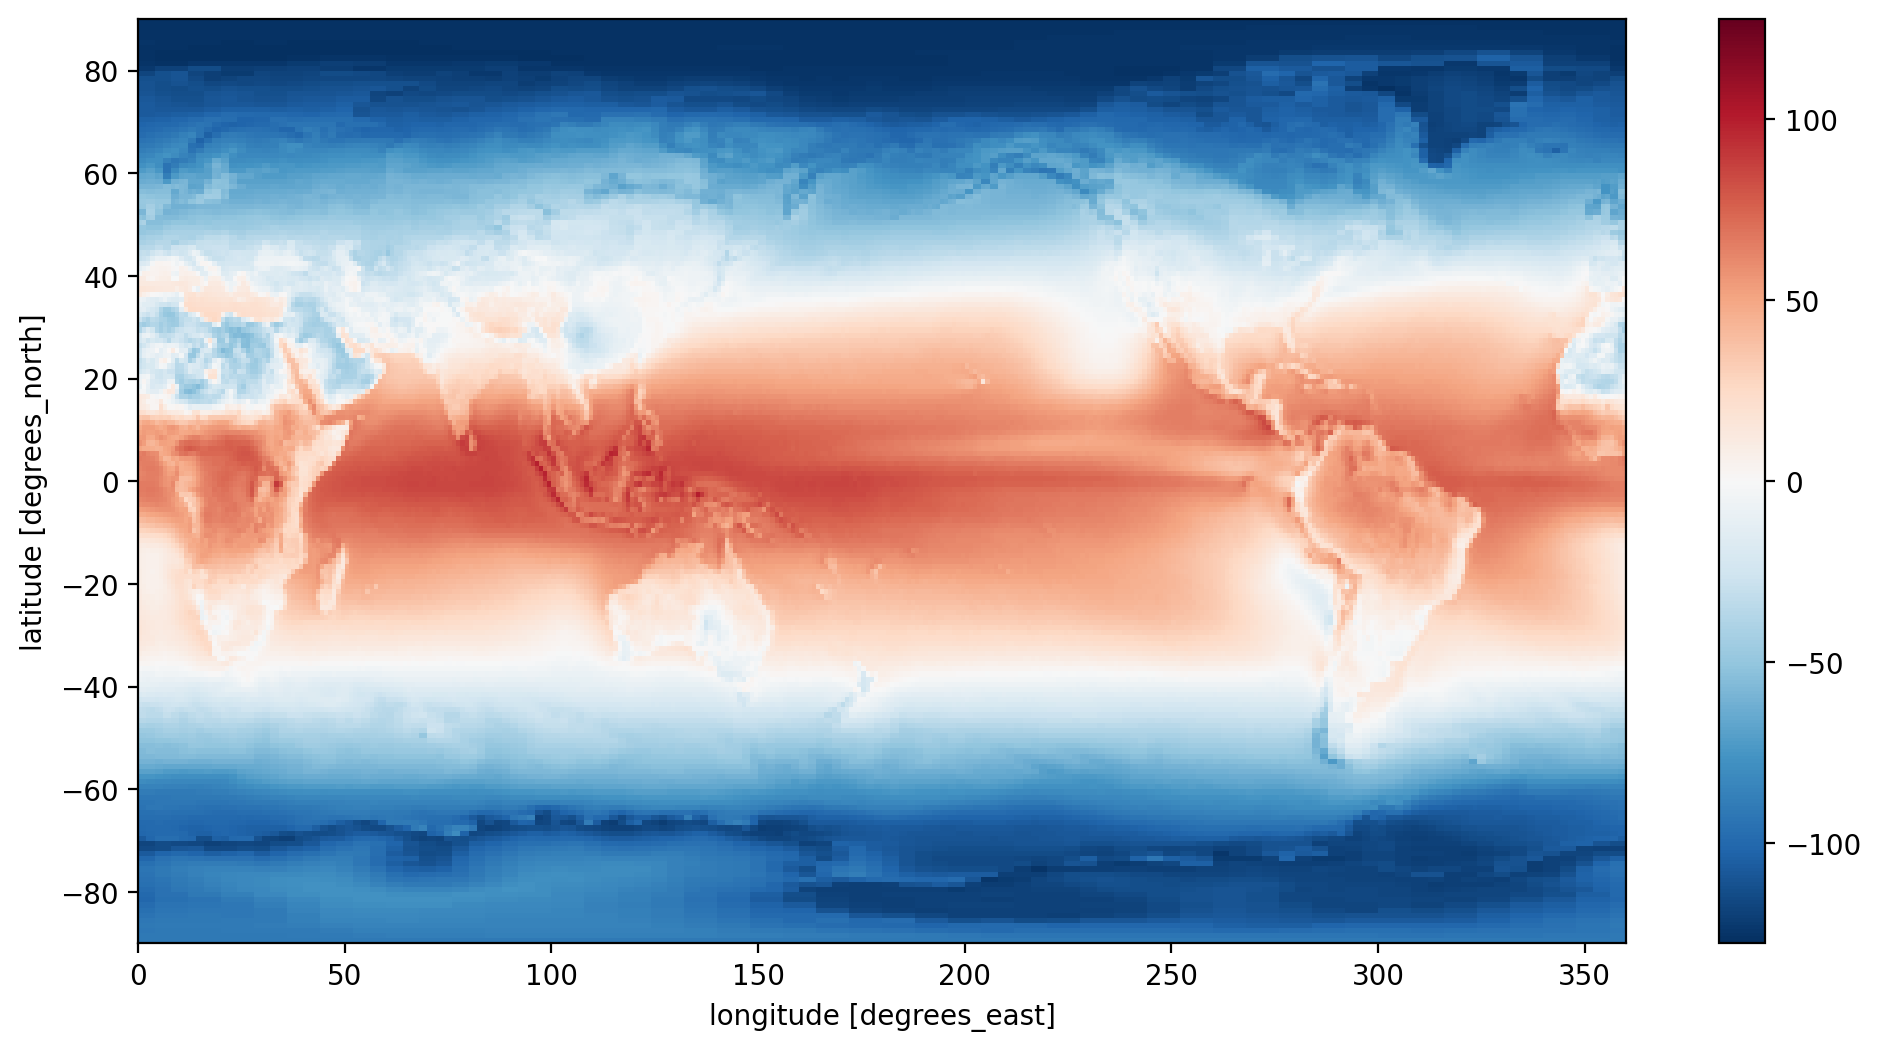

In [17]:
toa_calc = mean_vals.solar_mon - mean_vals.toa_sw_all_mon - mean_vals.toa_lw_all_mon
toa_calc.plot()

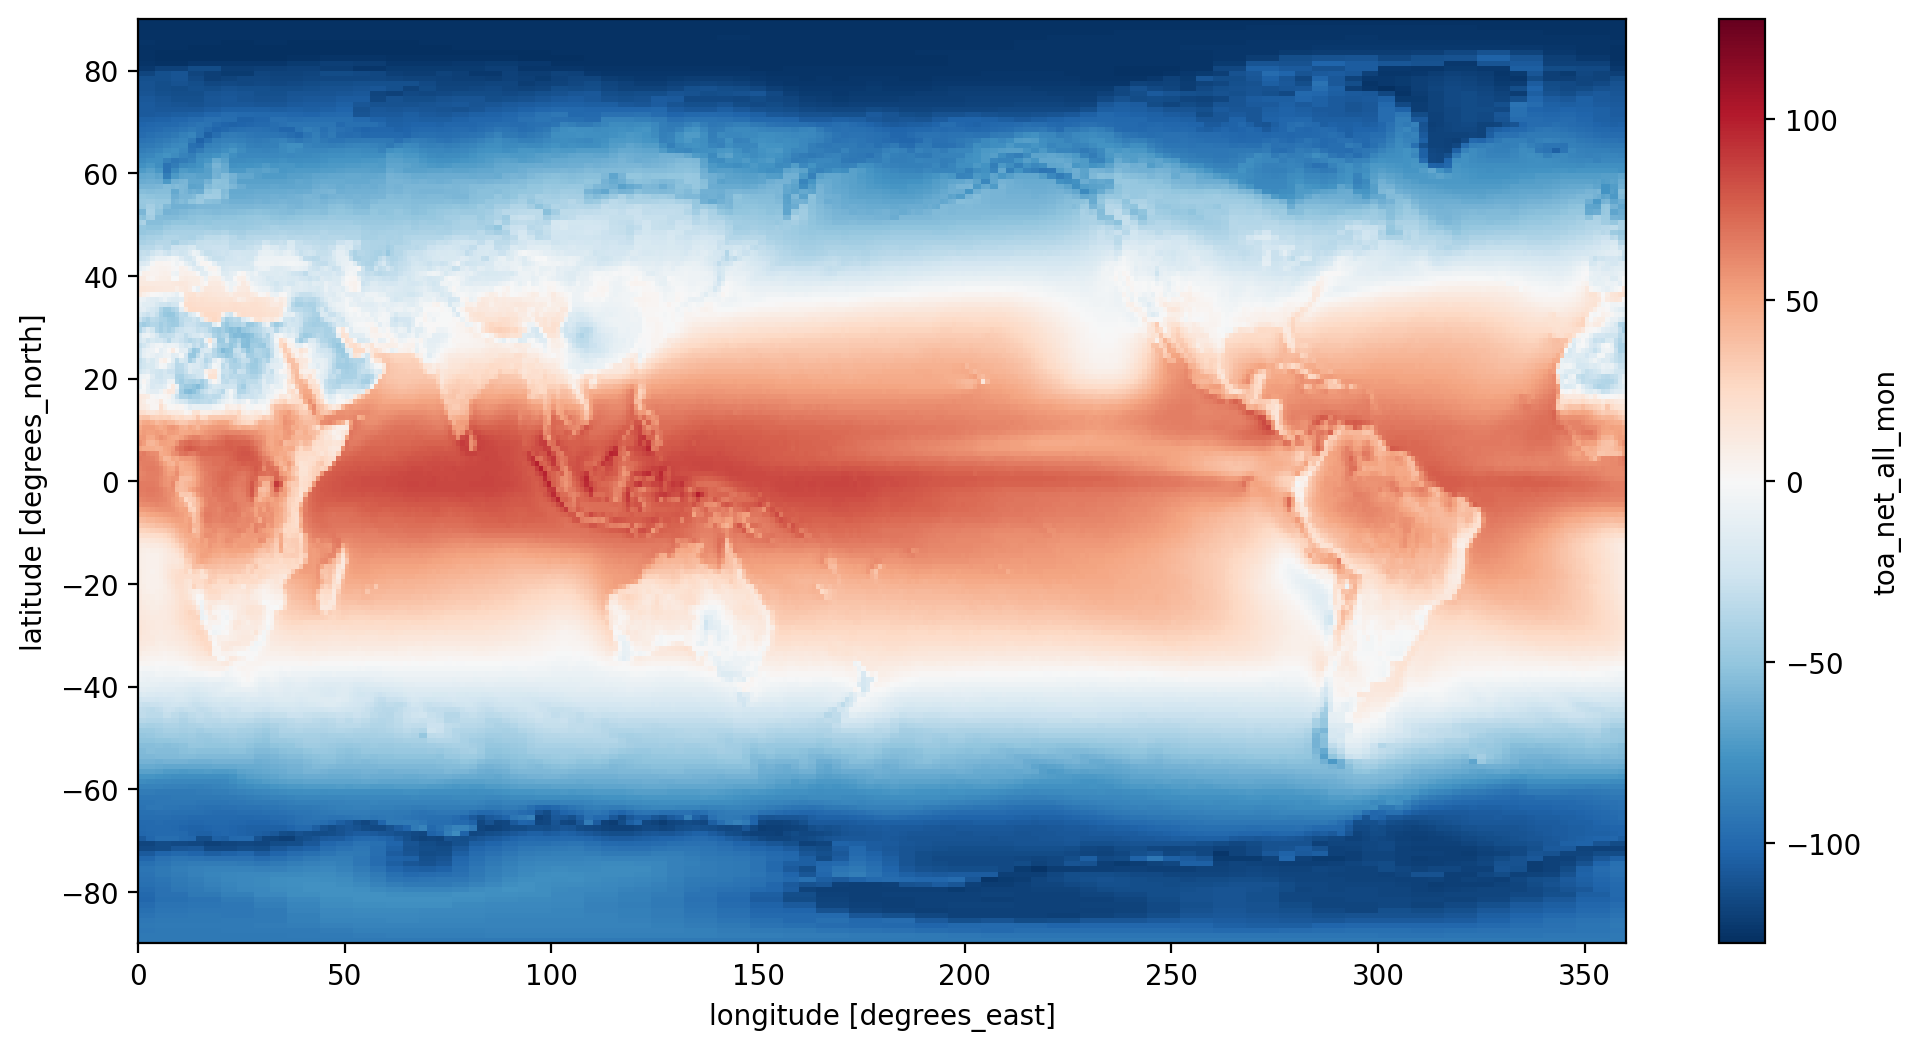

In [23]:
mean_vals.toa_net_all_mon.plot()

## 3) Mean and weighted mean

### 3.1) Calculate the global (unweighted) mean of TOA net radiation

Since the Earth is approximately in radiative balance, the net TOA radiation should be zero. But taking the naive mean from this dataset, you should find a number far from zero. Why?

In [27]:
ds.toa_net_all_mon.mean(dim=('lat', 'lon'))

<xarray.DataArray 'toa_net_all_mon' (time: 203)>
array([-32.834003, -31.31786 , -30.329313, -27.442085, -25.869328,
       -32.52349 , -37.794437, -34.86949 , -26.673292, -20.16625 ,
       -18.65032 , -26.647104, -31.440434, -31.955296, -30.743544,
       -27.762476, -26.318438, -32.91002 , -37.08712 , -34.6673  ,
       -26.521275, -21.1225  , -21.199871, -26.386793, -33.19824 ,
       -32.873142, -31.279255, -27.86096 , -27.939522, -33.70023 ,
       -38.522236, -34.917114, -27.235086, -20.437838, -20.916735,
       -25.586891, -32.151886, -32.391106, -30.32836 , -26.988653,
       -25.63085 , -31.816216, -37.107784, -35.20439 , -27.001163,
       -20.360872, -20.60428 , -25.735159, -32.587383, -31.457102,
       -30.884487, -27.947887, -25.42441 , -32.42672 , -36.931202,
       -34.78562 , -25.960703, -18.722065, -20.662516, -26.81267 ,
       -32.403614, -32.190594, -29.13933 , -26.850735, -27.114525,
       -32.593876, -37.44463 , -35.141235, -27.090885, -19.93956 ,
       -20.600077, -25.825865, -32.140648, -31.556578, -28.709179,
       -26.652119, -26.486334, -33.066647, -37.111267, -35.280155,
       -26.560879, -19.823437, -20.977945, -26.376177, -32.682644,
       -32.155396, -30.82079 , -26.070873, -25.896505, -32.17379 ,
       -37.995216, -35.341152, -27.804739, -21.244314, -19.403933,
       -26.635412, -31.87308 , -32.10661 , -28.640278, -25.6818  ,
...
       -18.919144, -20.603233, -26.433187, -31.46968 , -30.81205 ,
       -29.98459 , -25.726774, -26.20626 , -31.730497, -37.747684,
       -35.38663 , -27.955862, -20.452679, -21.494135, -27.76816 ,
       -33.38513 , -31.581379, -30.32277 , -25.92725 , -25.730116,
       -32.40152 , -37.666515, -35.162243, -27.450603, -20.441998,
       -20.184479, -26.39694 , -31.892115, -32.167526, -29.228746,
       -25.775454, -25.268593, -31.894764, -37.56416 , -33.67446 ,
       -26.753294, -21.026932, -20.260273, -25.10418 , -32.430264,
       -31.31276 , -28.659046, -24.955957, -24.82987 , -31.238792,
       -37.396652, -34.646103, -26.521566, -19.71922 , -22.838005,
       -26.064754, -31.534   , -31.898966, -29.187542, -26.73134 ,
       -25.796198, -32.338734, -38.524323, -35.329716, -26.793352,
       -20.427313, -21.196972, -26.88049 , -32.41938 , -31.668758,
       -29.486374, -26.908525, -26.369278, -31.124321, -37.191   ,
       -34.74405 , -26.69224 , -20.460108, -20.997923, -25.580482,
       -31.801458, -32.0972  , -28.94534 , -25.391537, -24.067162,
       -30.39914 , -35.853245, -34.40875 , -26.637983, -19.39416 ,
       -20.59489 , -27.64106 , -33.336475, -32.226513, -29.785393,
       -24.404518, -24.85121 , -31.884537, -36.926064, -35.041214,
       -26.887789, -19.646358, -19.575855], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2000-03-15 2000-04-15 ... 2017-01-15

The answer is that each "pixel" or "grid point" of this dataset does not represent an equal area of Earth's surface. So naively taking the mean, i.e. giving equal weight to each point, gives the wrong answer.

On a lat / lon grid, the relative area of each grid point is proportional to $\cos(\lambda)$. ($\lambda$ is latitude)

### 3.2) Create a `weight` array proportional to $\cos(\lambda)$

Think carefully a about radians vs. degrees


In [29]:
weight = np.cos(np.deg2rad(ds.lat))

### 3.3) Redo your global mean TOA net radiation calculation with this weight factor

Use xarray's [weighted array reductions](http://xarray.pydata.org/en/stable/user-guide/computation.html#weighted-array-reductions) to compute the weighted mean.

In [33]:
toa_net_all_mon_wm = ds.toa_net_all_mon.weighted(weights).mean()
toa_net_all_mon_wm

# According to Trenberth et al., 2022, the Earth's energy imbalance averaged 0.90 ± 0.15 W per m2
# from 2005 to 2019. My calculation falls within this margin of error.

<xarray.DataArray 'toa_net_all_mon' ()>
array(0.8780852, dtype=float32)

This time around, you should have found something much closer to zero. Ask a climate scientist what the net energy imbalance of Earth due to global warming is estimated to be. Do you think our calculation is precise enough to detect this? 

### 3.4) Now that you have a `weight` factor, verify that the TOA incoming solar, outgoing longwave, and outgoing shortwave approximately match up with infographic shown in the first cell of this assignment

In [39]:
solar_mon_wm = ds.solar_mon.weighted(weights).mean(dim=('lat', 'lon'))
solar_mon_wm
solar_mon_wm_val = np.mean(solar_mon_wm)
solar_mon_wm_val
# Close to 340.4

<xarray.DataArray 'solar_mon' ()>
array(340.28348, dtype=float32)

In [37]:
toa_lw_all_mon_wm = ds.toa_lw_all_mon.weighted(weights).mean(dim=('lat', 'lon'))
toa_lw_all_mon_wm
toa_lw_all_mon_wm_val = np.mean(toa_lw_all_mon_wm)
toa_lw_all_mon_wm_val
# Close to 239.9

<xarray.DataArray 'toa_lw_all_mon' ()>
array(240.26682, dtype=float32)

In [40]:
toa_sw_all_mon_wm = ds.toa_sw_all_mon.weighted(weights).mean(dim=('lat', 'lon'))
toa_sw_all_mon_wm
toa_sw_all_mon_wm_val = np.mean(toa_sw_all_mon_wm)
toa_sw_all_mon_wm_val
# Close to 99.9

<xarray.DataArray 'toa_sw_all_mon' ()>
array(99.138565, dtype=float32)

## 4) Meridional Heat Transport Calculation

We can go beyond a weight factor and actually calculate the area of each pixel of the dataset, using the formula

$$ dA = R^2 \cos(\lambda) d\lambda d \varphi $$

where $d\lambda$ and $d\varphi$ are the spacing of the points in latitude and longitude (measured in radians). We can approximate Earth's radius as $R = 6,371$ km.

### 4.1) calculate the pixel area using this formula and create a 2D (lon, lat) DataArray for it

(Xarray's `ones_like` function can help you easily create and broadcast DataArrays.) Verify that the sum of all the pixels equals the Earth's true surface area as evaluated using the formula for the area of a sphere (yes, the Earth is not a sphere ... it's just a homework problem).

In [48]:
# Convert degrees to radians
lat_rad = np.radians(ds['lat'])
lon_rad = np.radians(ds['lon'])

# distance between 2 lat and lon points 
d_lat_rad = xr.ones_like(ds['lat'])[:-1]
d_lon_rad = xr.ones_like(ds['lon'])[:-1]

for i in range(len(lat_rad) - 1):
    diff_lat_rad = lat_rad[i + 1] - lat_rad[i]
    d_lat_rad[i] = diff_lat_rad

for i in range(len(lon_rad) - 1):
    diff_lon_rad = lon_rad[i + 1] - lon_rad[i]
    d_lon_rad[i] = diff_lon_rad

r = 6371

# dA=R^2cos(λ)dλdϕ
dA = r**2*np.cos(lat_rad)*(d_lat_rad)*(d_lon_rad)

dA_sum = dA.sum()

earth_sa= 4*np.pi*(r**2)

# Print dA_sum and earth_sphere_area
print('Sum of all pixels:', dA_sum)
print("Earth's surface area:", E_area)

Sum of all pixels: <xarray.DataArray ()>
array(5.08615326e+08)
Earth's surface area: 510064471.90978825



### 4.2) Calculate and plot the total amount of net radiation in each 1-degree latitude band
Multiplying the pixel area (m$^2$) from above with the radiative flux (W m$^{-2}$) gives you the total amount of radiation absorbed in each pixel in W.

Label with correct units.

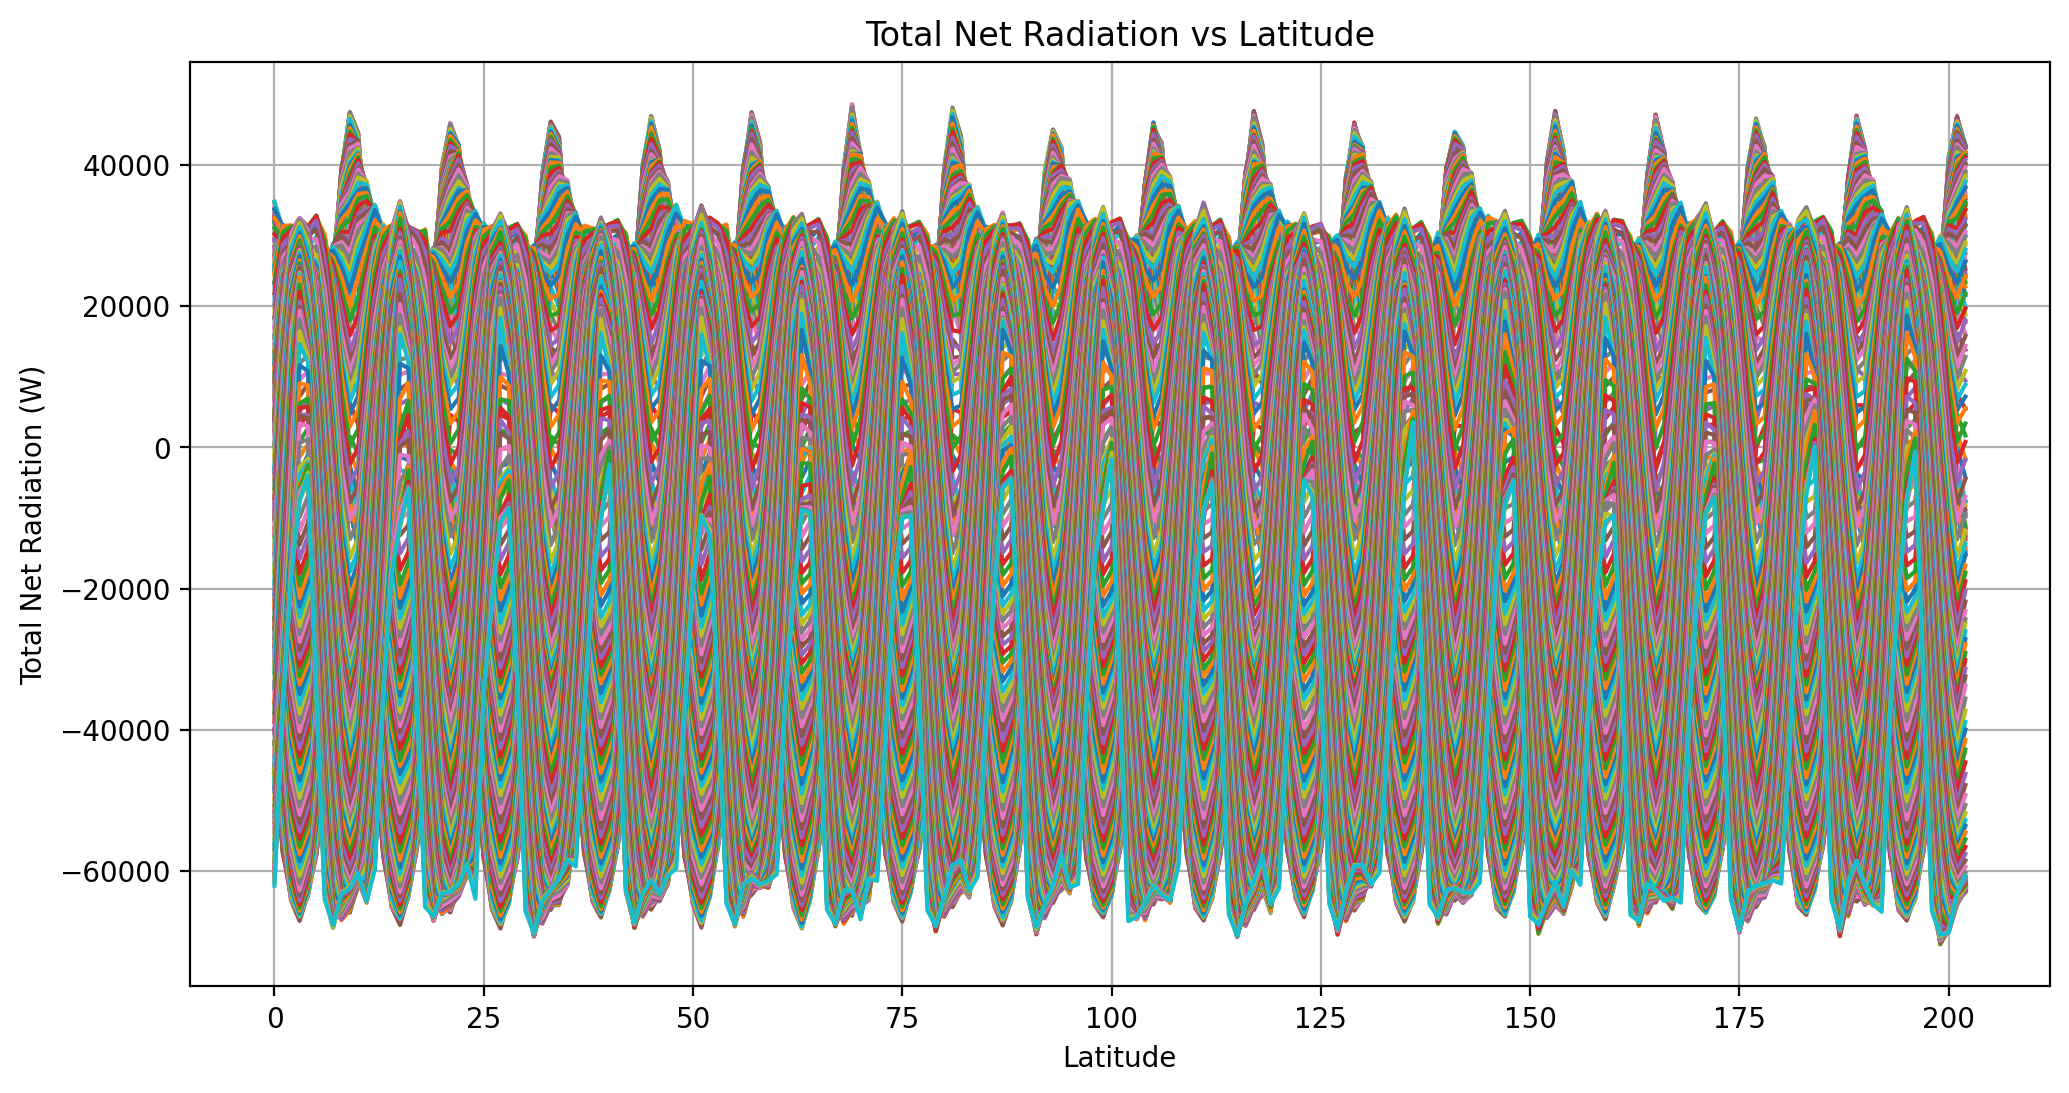

In [55]:
area_per_lat = dA.sum(axis=1)

net_flux_lat_sum = ds.toa_net_all_mon.sum(dim='lon')

net_rad_per_lat_band = net_flux_lat_sum * area_per_lat

plt.plot(net_flux_lat_sum);
plt.grid(True);
plt.xlabel('Latitude');
plt.ylabel('Total Net Radiation (W)');
plt.title('Total Net Radiation vs Latitude');

### 4.3) Plot the cumulative sum of the total amount of net radiation as a function of latitude

Label with correct units. (Hint: check out xarray's [cumsum](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.cumsum.html) function.)

This curve tells you how much energy must be transported meridionally by the ocean and atmosphere in order to account for the radiative imbalance at the top of the atmosphere.

You should get a curve that looks something like this: https://journals.ametsoc.org/view/journals/clim/14/16/full-i1520-0442-14-16-3433-f07.gif (Figure from Trenberth & Caron, 2001)

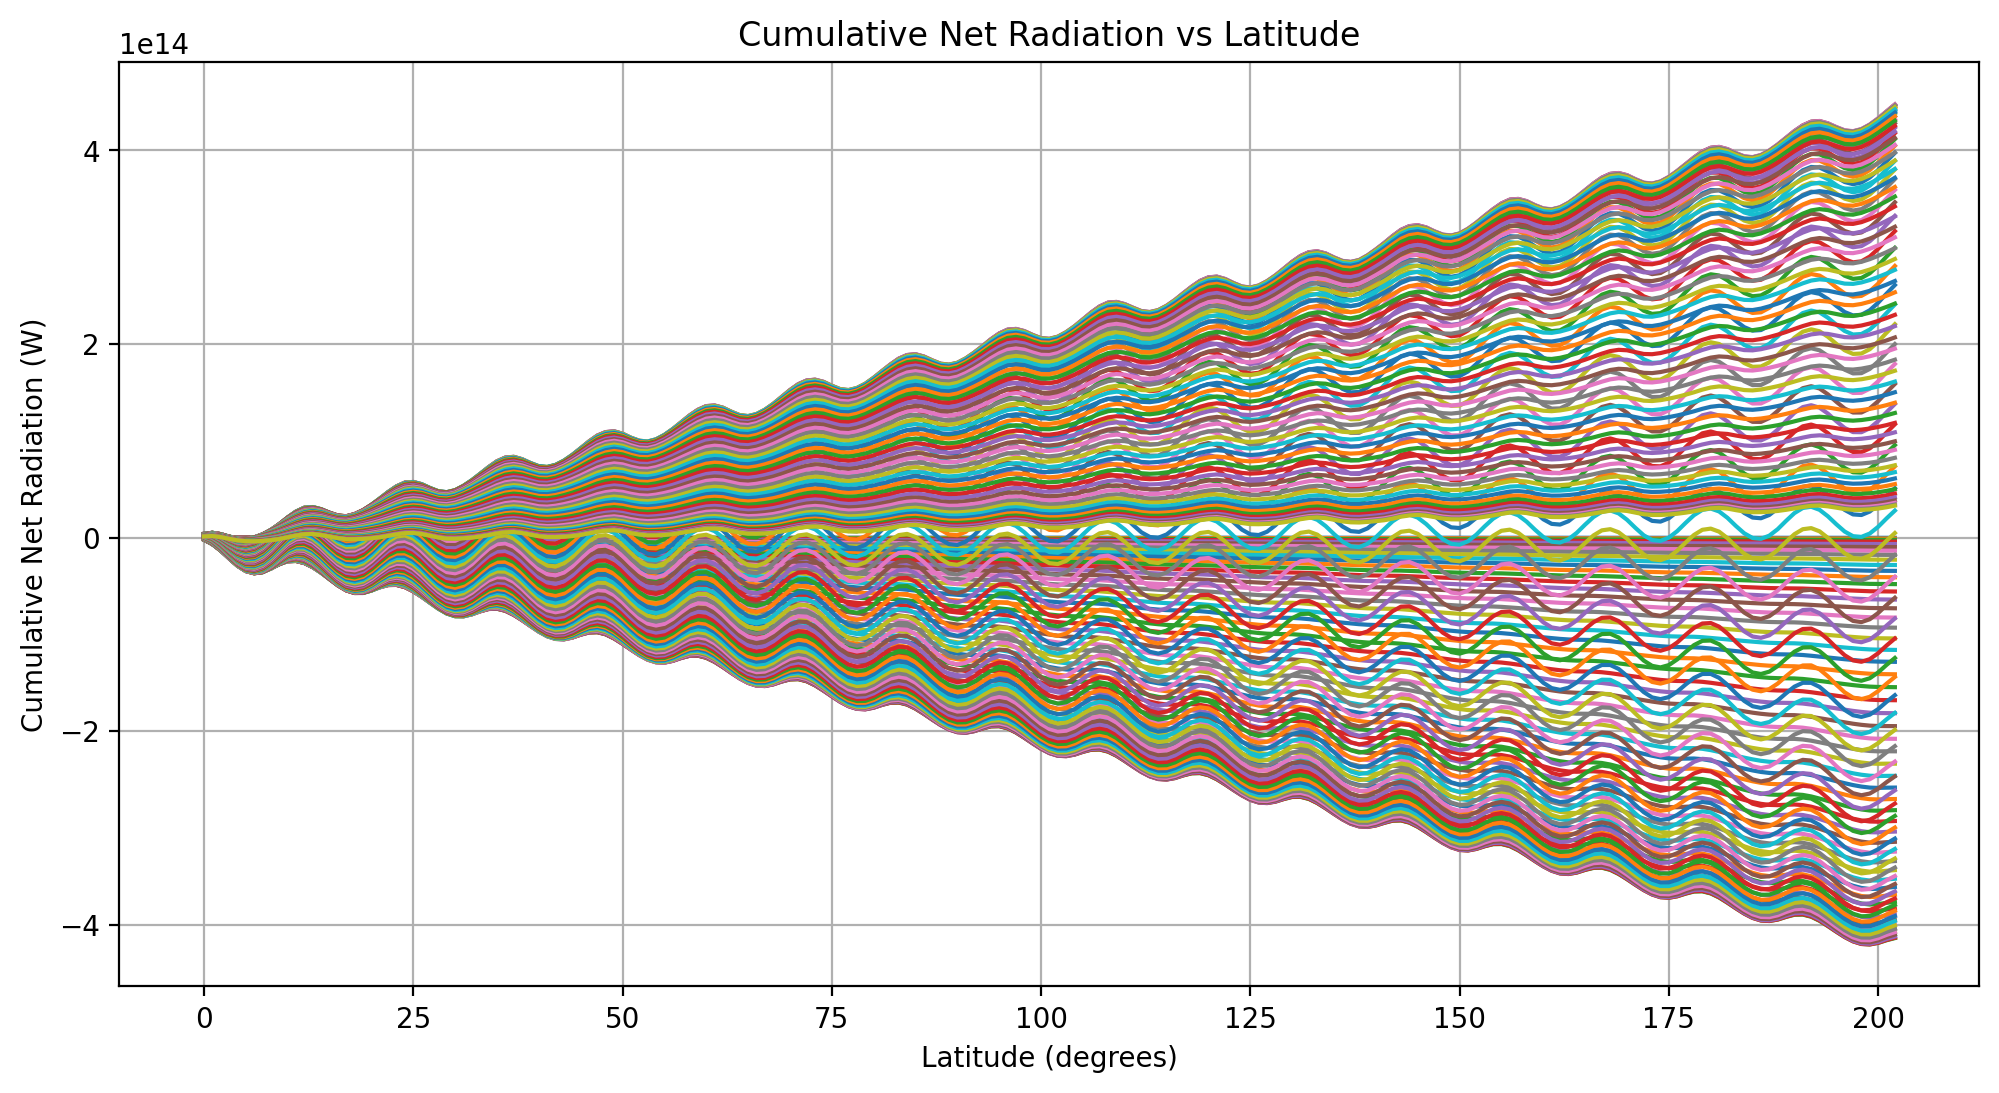

In [56]:
cum_net_rad = np.cumsum(net_rad_per_lat_band)

plt.plot(cum_net_rad)
plt.xlabel('Latitude (degrees)')
plt.ylabel('Cumulative Net Radiation (W)')
plt.title('Cumulative Net Radiation vs Latitude')
plt.grid(True)
plt.show()

## 5) Selecting and Merging Data

For the next problem, use the following approximate locations of four different cities.

| city | lon | lat |
| -- | -- | -- |
| NYC |74 W | 40 N | 
| Nome, Alaska | 165 W | 64 N | 
| Columbo, Sri Lanka | 80 E | 7 N |
| Hobart, Tasmania | 147 E | 43 S |


### 5.1) Create a `Dataset` for each point from the global dataset
Each city should get its own `Dataset` with the same variables as the one you imported. Find the nearest associated incoming solar radiation and net radiation timeseries at each city.

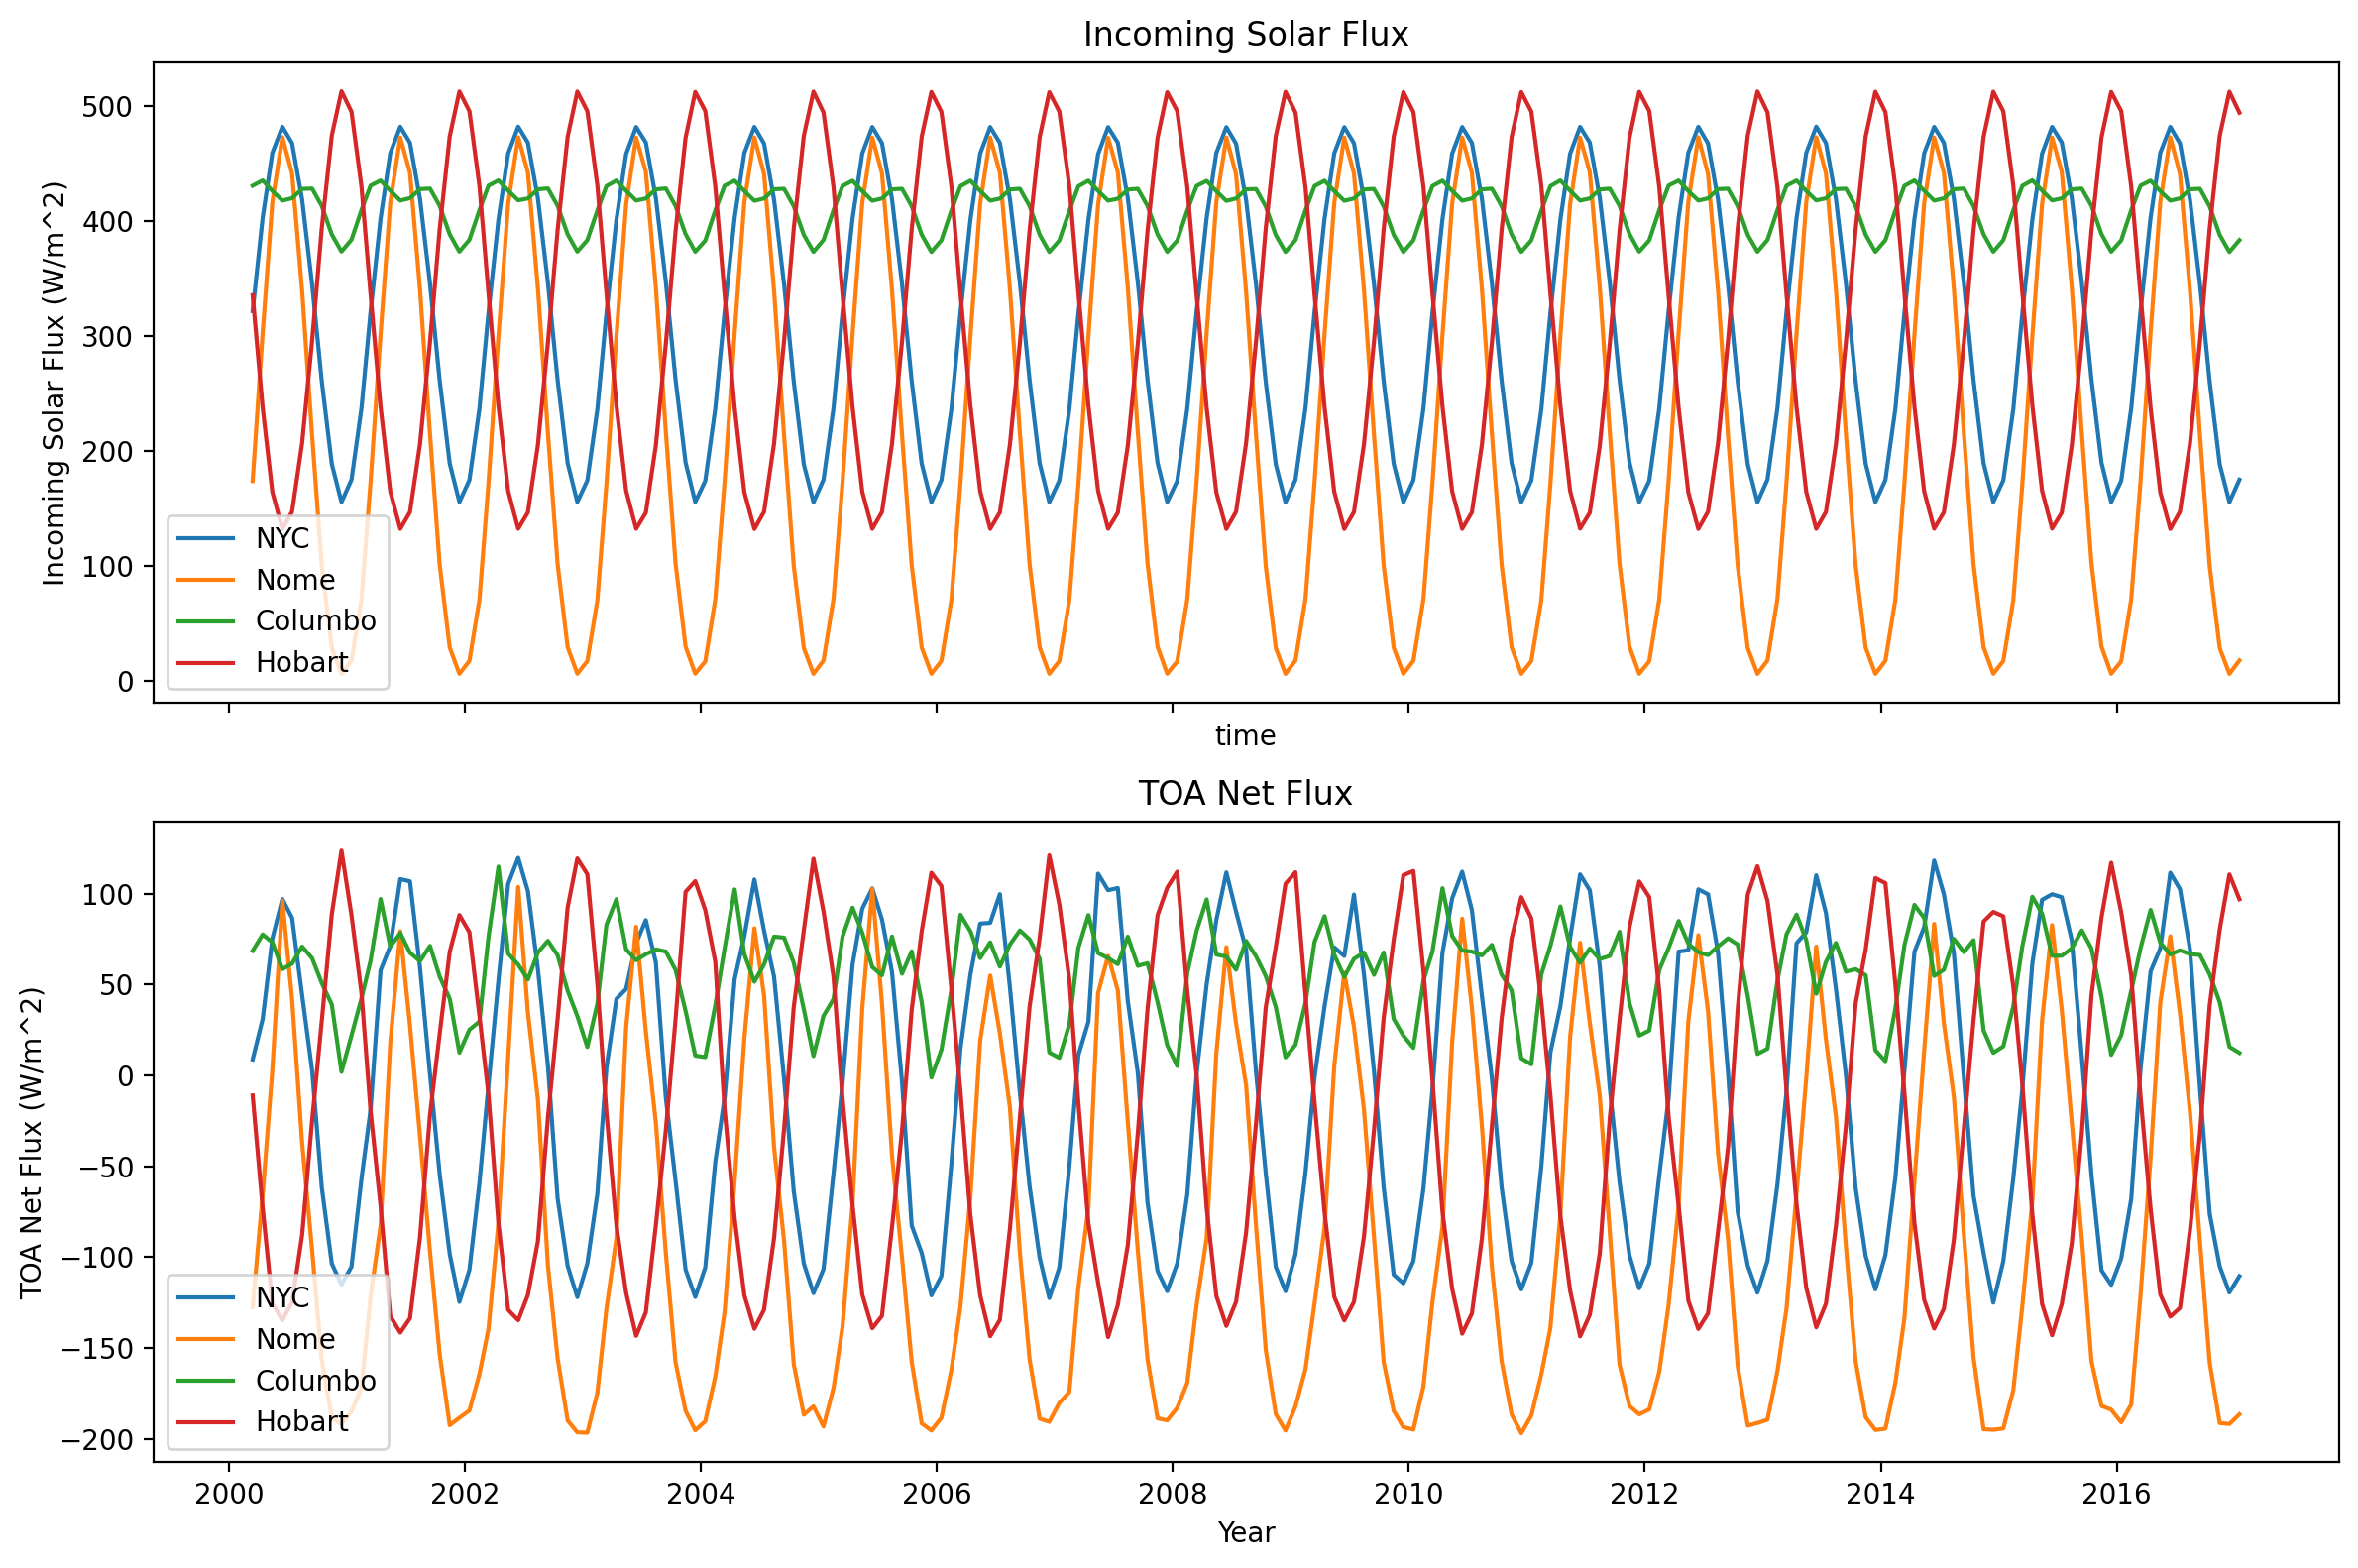

In [58]:
NYC = ds.sel(lon=360-74, lat=40, method='nearest')
Nome = ds.sel(lon=360-165, lat=64, method='nearest')
Columbo = ds.sel(lon=80, lat=7, method='nearest')
Hobart = ds.sel(lon=147, lat=-43, method='nearest')

fig, ax = plt.subplots(nrows=2, figsize=(12, 8), sharex=True)

NYC.solar_mon.plot(ax=ax[0], label='NYC')
Nome.solar_mon.plot(ax=ax[0], label='Nome')
Columbo.solar_mon.plot(ax=ax[0], label='Columbo')
Hobart.solar_mon.plot(ax=ax[0], label='Hobart')
ax[0].set_title('Incoming Solar Flux')
ax[0].set_ylabel('Incoming Solar Flux (W/m^2)')
ax[0].legend()

NYC.toa_net_all_mon.plot(ax=ax[1], label='NYC')
Nome.toa_net_all_mon.plot(ax=ax[1], label='Nome')
Columbo.toa_net_all_mon.plot(ax=ax[1], label='Columbo')
Hobart.toa_net_all_mon.plot(ax=ax[1], label='Hobart')
ax[1].set_title('TOA Net Flux')
ax[1].set_ylabel('TOA Net Flux (W/m^2)')
ax[1].legend()
plt.xlabel('Year')
plt.tight_layout()
plt.show()

### 5.2) Merge these four datasets into a new dataset with the new dimension `city`

Create a new dimension coordinate to hold the city name.
Display the merged dataset.

In [59]:
ds_merge = xr.concat([NYC, Nome, Columbo, Hobart], dim='city')
ds_merge

<xarray.Dataset>
Dimensions:                      (city: 4, time: 203)
Coordinates:
    lon                          (city) float32 286.5 195.5 80.5 147.5
  * time                         (time) datetime64[ns] 2000-03-15 ... 2017-01-15
    lat                          (city) float32 40.5 64.5 7.5 -42.5
Dimensions without coordinates: city
Data variables: (12/14)
    toa_sw_all_mon               (city, time) float32 89.36 155.3 ... 137.6
    toa_lw_all_mon               (city, time) float32 223.2 216.2 ... 259.2
    toa_net_all_mon              (city, time) float32 8.813 31.08 ... 97.02
    toa_sw_clr_mon               (city, time) float32 38.75 47.61 ... 75.11
    toa_lw_clr_mon               (city, time) float32 253.2 259.4 ... 284.6
    toa_net_clr_mon              (city, time) float32 29.48 95.62 ... 134.2
    ...                           ...
    toa_cre_net_mon              (city, time) float32 -20.66 -64.55 ... -37.13
    solar_mon                    (city, time) float32 321.4 402.6 ... 493.8
    cldarea_total_daynight_mon   (city, time) float32 56.61 71.12 ... 46.37
    cldpress_total_daynight_mon  (city, time) float32 574.6 510.1 ... 641.1
    cldtemp_total_daynight_mon   (city, time) float32 250.3 247.7 ... 265.2
    cldtau_total_day_mon         (city, time) float32 5.157 11.39 ... 6.653
Attributes:
    title:             CERES EBAF (Energy Balanced and Filled) TOA Fluxes. Mo...
    institution:       NASA/LaRC (Langley Research Center) Hampton, Va
    Conventions:       CF-1.4
    comment:           Data is from East to West and South to North.
    Version:           Edition 4.0; Release Date March 7, 2017
    Fill_Value:        Fill Value is -999.0
    DOI:               10.5067/TERRA+AQUA/CERES/EBAF-TOA_L3B.004.0
    Production_Files:  List of files used in creating the present Master netC...

### 5.3) Plot the incoming solar and net radiation at each city

Make two separate plots.
Try to have your legend created automatically from the data.

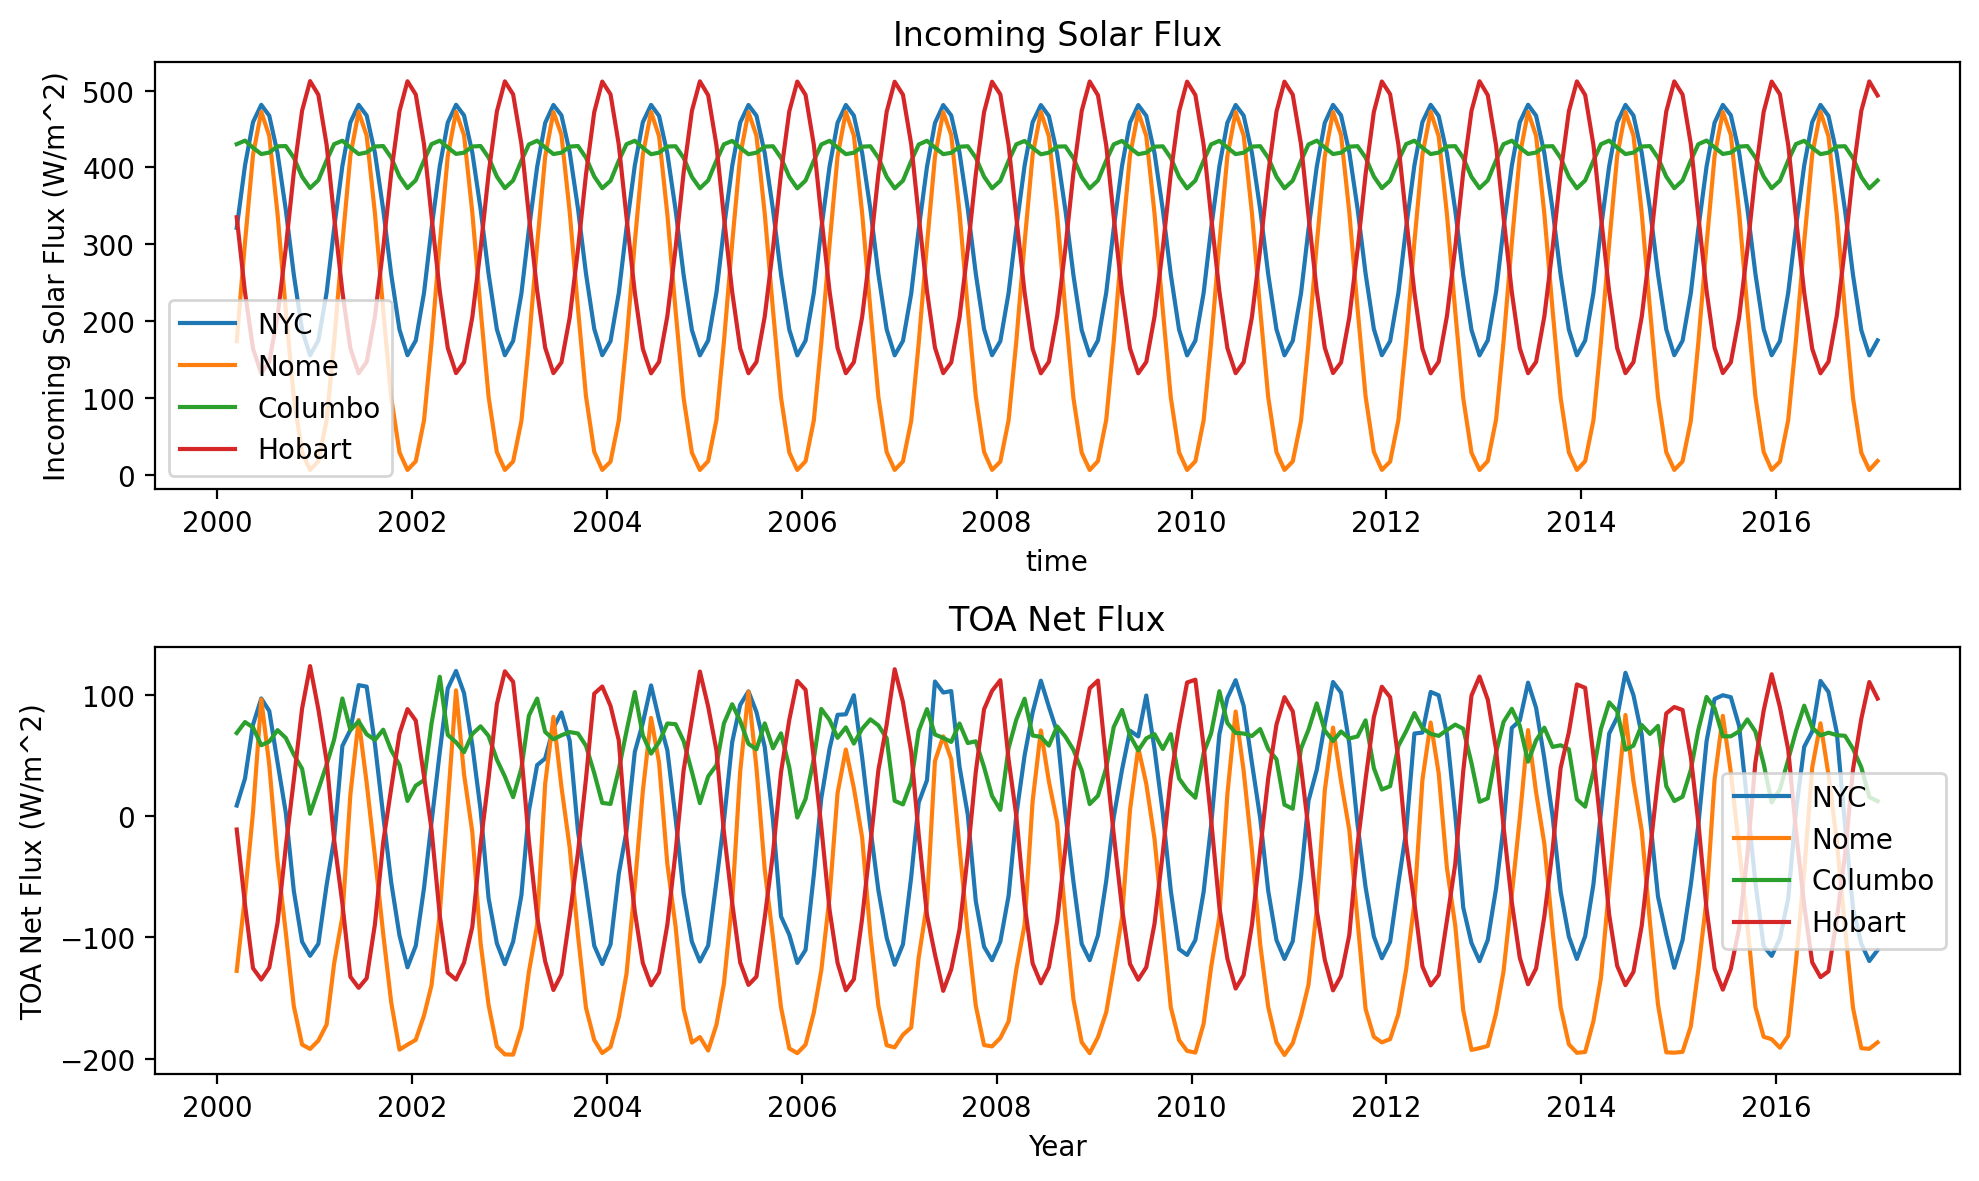

In [62]:
ds_merge['city'] = ['NYC', 'Nome', 'Columbo', 'Hobart']

fig, ax = plt.subplots(nrows=2, figsize=(10, 6))

ds_merge.solar_mon.plot.line(ax=ax[0], x='time', hue='city')
ax[0].legend(labels=ds_merge['city'].values)
ax[0].set_title('Incoming Solar Flux')
ax[0].set_ylabel('Incoming Solar Flux (W/m^2)')

ds_merge.toa_net_all_mon.plot.line(ax=ax[1], x='time', hue='city')
ax[1].legend(labels=ds_merge['city'].values)
ax[1].set_title('TOA Net Flux')
ax[1].set_ylabel('TOA Net Flux (W/m^2)')

plt.xlabel('Year')
plt.tight_layout()
plt.show()